In [1]:
# Importing Neccessary Libraries
import pandas as pd

In [2]:
# Uploading the data with file name 'train (1).csv' using pandas
dp = pd.read_csv('data/train.csv')

In [3]:
# We make a copy of the original dataframe.
df = dp.copy()

In [4]:
# We see a glipmse of our dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Knowing more about the data types in our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Identifying Data Cleaning Issues

(1) There are NaN values in Age column.

(2) We need not require columns like PassengerId, Name, Cabin and Ticket.

(3) Apart form Survived Column having values '0' and '1', Creating a new Column with Class/Categorical Status of Survival is needed mentioning 'Survived' or 'Did Not Survived'.

(4) Fare value i.e. 512.32 in the data is an outlier

In [7]:
print('Mean Fare is', df['Fare'].mean())
print('Minimum Fare is',df['Fare'].min())
print('Maximum Fare is', df['Fare'].max())

Mean Fare is 32.204207968574636
Minimum Fare is 0.0
Maximum Fare is 512.3292


In [8]:
# let's see that how many unique values are there in our data set.
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [9]:
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [10]:
# Second Data Cleaning Issue: we need not require columns like PassengerId, Name, Cabin and Ticket Hence we remove them.
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# We check our first cleaning issue is resolved or not. 
#And it is resolved. Now we do not have any NaN values in our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
#Third : Creating a Column with Class/Categorical Status of Survival instead of Numbers

df['Survival_Status'] = df['Survived'].replace({1: 'Survived', 0: 'Did Not Survived'})

In [14]:
# Checking our Third Cleaning Issue
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival_Status
0,0,3,male,22.0,1,0,7.2500,S,Did Not Survived
1,1,1,female,38.0,1,0,71.2833,C,Survived
2,1,3,female,26.0,0,0,7.9250,S,Survived
3,1,1,female,35.0,1,0,53.1000,S,Survived
4,0,3,male,35.0,0,0,8.0500,S,Did Not Survived


In [15]:
# Fourth: Cleaning issue where the outlier Fare 512.32 needs to be removed from data
df = df[df['Fare'] < 512]

In [16]:
df[df['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival_Status


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival_Status
0,0,3,male,22.0,1,0,7.2500,S,Did Not Survived
1,1,1,female,38.0,1,0,71.2833,C,Survived
2,1,3,female,26.0,0,0,7.9250,S,Survived
3,1,1,female,35.0,1,0,53.1000,S,Survived
4,0,3,male,35.0,0,0,8.0500,S,Did Not Survived
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Did Not Survived
887,1,1,female,19.0,0,0,30.0000,S,Survived
888,0,3,female,NaN,1,2,23.4500,S,Did Not Survived
889,1,1,male,26.0,0,0,30.0000,C,Survived


In [47]:
#Saving the Cleaned data in csv format into our PC
df.to_csv('data/Titanic.csv') 

In [19]:
# We look at first five rows in our data set
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival_Status
0,0,3,male,22.0,1,0,7.2500,S,Did Not Survived
1,1,1,female,38.0,1,0,71.2833,C,Survived
2,1,3,female,26.0,0,0,7.9250,S,Survived
3,1,1,female,35.0,1,0,53.1000,S,Survived
4,0,3,male,35.0,0,0,8.0500,S,Did Not Survived


In [20]:
# To investigate measures of centre
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,29.675345,0.524775,0.381757,30.582164
std,0.486091,0.834007,14.552495,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


In [43]:
df.dtypes

Survived             int64
Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Survival_Status     object
dtype: object

In [45]:
# Select only the relevant numeric columns
num_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
# Let us see if there is any co-linearity or correlation amongst the variables.
corr = df[num_columns].corr()
print(corr)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.334068 -0.079472 -0.033395  0.082157  0.261742
Pclass   -0.334068  1.000000 -0.368625  0.080937  0.018212 -0.604960
Age      -0.079472 -0.368625  1.000000 -0.307639 -0.189194  0.100396
SibSp    -0.033395  0.080937 -0.307639  1.000000  0.415141  0.211816
Parch     0.082157  0.018212 -0.189194  0.415141  1.000000  0.263910
Fare      0.261742 -0.604960  0.100396  0.211816  0.263910  1.000000


In [32]:
# Let us import our neccessary libraries for our visualisation
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

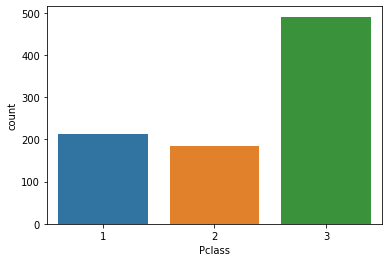

In [23]:
# Number of Passenger travelled in each type of Class
sb.countplot(data = df, x = 'Pclass');

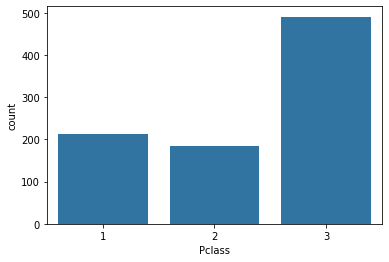

In [24]:
color_palette = sb.color_palette()[0]
sb.countplot(data = df, x = 'Pclass', color= color_palette);

In [25]:
ordered = df['Pclass'].value_counts().index

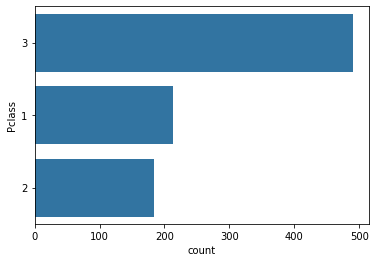

In [26]:
sb.countplot(data = df, y = 'Pclass', color= color_palette, order = ordered);

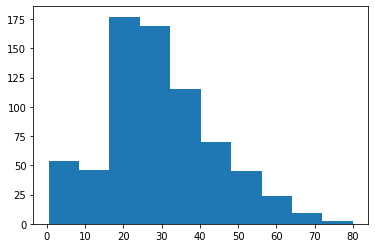

In [27]:
# Histogram for Quantitative Variable 'Age'
# By default the bin size is 10

plt.hist(data = df, x = 'Age');

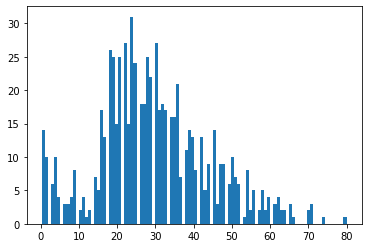

In [28]:
plt.hist(data = df, x = 'Age', bins = 100);

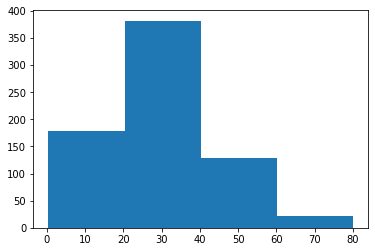

In [29]:
plt.hist(data = df, x = 'Age', bins = 4);

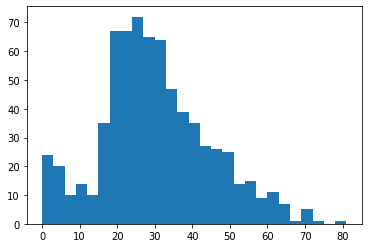

In [30]:
Bin = np.arange(0, df['Age'].max() + 3, 3)
plt.hist(data = df, x = 'Age', bins = Bin);

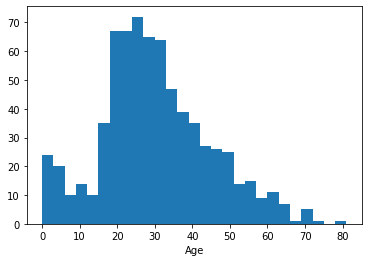

In [33]:
sb.distplot(df['Age'], kde = False, hist_kws= {'alpha' : 1}, bins = Bin);

In [34]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

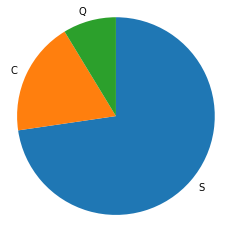

In [35]:
# Let us try to create pie chart for Embarked variable
counts = df['Embarked'].value_counts()
plt.pie(counts, labels = counts.index,startangle= 90, counterclock= False)
plt.axis('square');

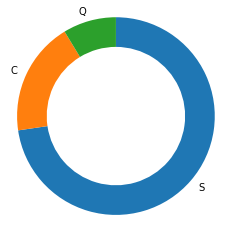

In [36]:
# Let's plot a donut
counts = df['Embarked'].value_counts()
plt.pie(counts, labels = counts.index, startangle= 90, counterclock= False, wedgeprops = {'width' : 0.3})
plt.axis('square');


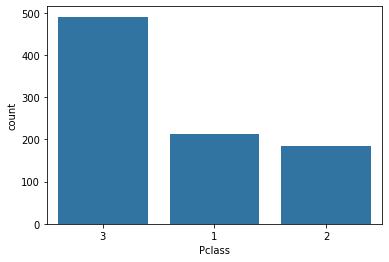

In [37]:
#Plotting bar chart using figure
fig = plt.figure()
color_palette = sb.color_palette()[0]
ordered = df['Pclass'].value_counts().index
sb.countplot(data = df, x = 'Pclass', color= color_palette, order = ordered);

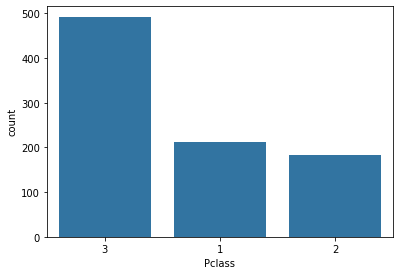

In [38]:
#Let us use axes in our plot
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8])
color_palette = sb.color_palette()[0]
ordered = df['Pclass'].value_counts().index
sb.countplot(data = df, x = 'Pclass', color= color_palette, order = ordered);

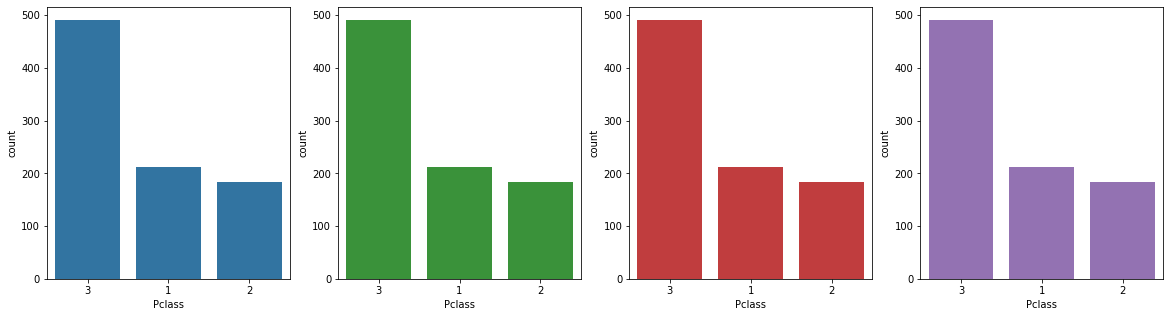

In [39]:
# let us create subplots
plt.figure(figsize=[20,5])

plt.subplot(1,4,1)
color_palette = sb.color_palette()[0]
ordered = df['Pclass'].value_counts().index
sb.countplot(data = df, x = 'Pclass', color= color_palette, order = ordered);

plt.subplot(1,4,2)
color_palette = sb.color_palette()[2]
ordered = df['Pclass'].value_counts().index
sb.countplot(data = df, x = 'Pclass', color= color_palette, order = ordered);

plt.subplot(1,4,3)
color_palette = sb.color_palette()[3]
ordered = df['Pclass'].value_counts().index
sb.countplot(data = df, x = 'Pclass', color= color_palette, order = ordered);

plt.subplot(1,4,4)
color_palette = sb.color_palette()[4]
ordered = df['Pclass'].value_counts().index
sb.countplot(data = df, x = 'Pclass', color= color_palette, order = ordered);

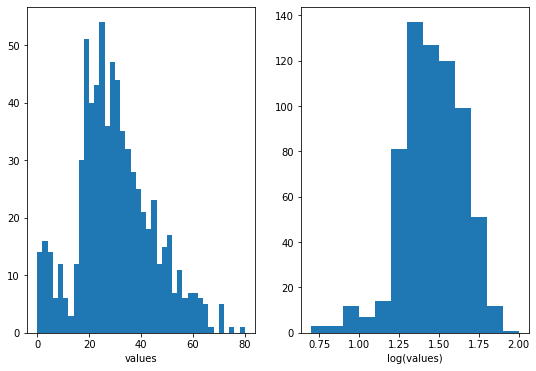

In [40]:
# Lets plot two plot one without transformation and another with log transformation
plt.figure(figsize = [9, 6])

data = df['Age']
# left histogram: data plotted without scaling
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, data.max()+2, 2)
plt.hist(data, bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after logarithmic transformation
plt.subplot(1, 2, 2)
log_data = np.log10(data) # direct data transform
log_bin_edges = np.arange(0.7, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)');